#Filtering Image With Python


---
Indah Yunita

Contact: indahyun77@gmail.com



In [ ]:
import cv2
from matplotlib import pyplot as plt
from skimage.util import random_noise
from google.colab.patches import cv2_imshow
import glob
import pandas as pd
from math import sqrt
from math import log10
from google.colab import files

In [ ]:
#path untuk sample image
path = ('drive/MyDrive/Jagung All/Bulai_1000/')

In [ ]:
#path untuk load 1000 image
images_path = glob.glob('drive/MyDrive/Jagung All/Bulai_1000/*.png')

In [ ]:
# Inisiasi Writer Excel
writer = pd.ExcelWriter('Hasil_Evaluasi.xlsx')

### Fungsi Comparing Image

In [ ]:
def compare_image (image1, image2, title):
  fig = plt.figure(title)
  plt.suptitle(title)
  # show first image
  ax = fig.add_subplot(1,2,1)
  plt.imshow(image1, cmap = plt.cm.gray)
  plt.axis("off")
	# show the second image
  ax = fig.add_subplot(1,2,2)
  plt.imshow(image2, cmap = plt.cm.gray)
  plt.axis("off")
  # show the images
  plt.show()

### Fungsi Menambahkan Noise (Salt&Pepper Noise dan Gaussian Noise)

In [ ]:
def add_noise(image):
  salt_pepper = random_noise(image, mode='s&p', amount=0.3)
  salt_pepper = np.array(255 * salt_pepper, dtype='uint8')
  gauss = random_noise(image, mode='gaussian')
  gauss = np.array(255 * gauss, dtype='uint8')
  return salt_pepper, gauss

### Fungsi Evaluation (MSE, RMSE, PSNR)

In [ ]:

def evaluation(image, filter):
  row, col = image.shape
  mse= sum(sum((image-filter)**2))/(row*col)
  rmse = sqrt(mse)
  psnr = 10*log10(256*256/mse)
  # print("MSE:",mse)
  # print("RMSE:",rmse)
  # print("PSNR:",psnr)

  return mse, rmse, psnr



### Perbandingan Salt&Pepper dan Gaussian Noise

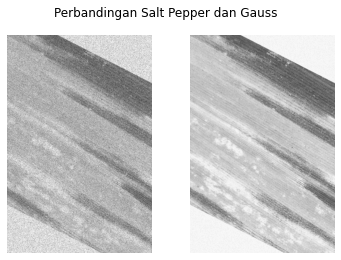

In [ ]:
img_real1 = cv2.imread(path +'Bulai_1 (10).png',0)
sp, gauss = add_noise(img_real1)
compare_image(sp, gauss, "Perbandingan Salt Pepper dan Gauss")



# Median Filter

### Perbandingan Salt&Pepper dan Median Filter

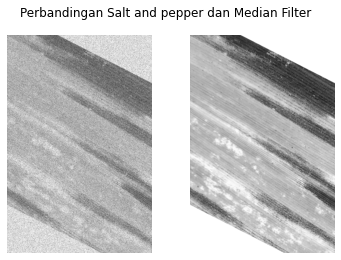

In [ ]:
img_median = cv2.medianBlur(img_real1, 3)
compare_image(sp, img_median, "Perbandingan Salt and pepper dan Median Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_median)

MSE: 0.06265606978085352
RMSE: 0.2503119449424128
PSNR: 60.195167811571736


### Load Evaluasi 1000 Gambar Median Filter

In [ ]:

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  sp, gauss = add_noise(img_real)
  img_median = cv2.medianBlur(img_real, 3)
  mse, rmse, psnr = evaluation(img_real, img_median)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Median")
writer.save()

# Average Filter

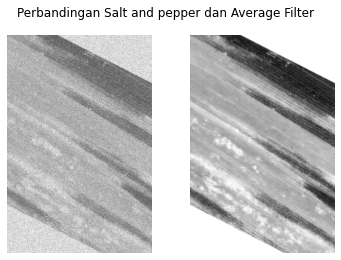

In [ ]:
img_average = cv2.blur(img_real1,(9,9))
compare_image(sp, img_average, "Perbandingan Salt and pepper dan Average Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_average)

MSE: 0.06285827566320645
RMSE: 0.2507155273675854
PSNR: 60.1811746740421


In [ ]:
from google.colab import files

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  img_average = cv2.blur(img_real,(9,9))
  mse, rmse, psnr = evaluation(img_real, img_average)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Average")
writer.save()

# Wiener 

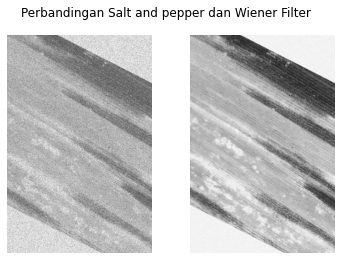

In [ ]:
sp, gauss = add_noise(img_real1)
img_wiener = cv2.blur(gauss,(5,5))
compare_image(sp, img_wiener, "Perbandingan Salt and pepper dan Wiener Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_wiener)

MSE: 39607.42996419115
RMSE: 199.01615503318104
PSNR: 2.1870326768372292


In [ ]:
from google.colab import files

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  sp, gauss = add_noise(img_real)
  img_wiener = cv2.blur(gauss,(5,5))
  mse, rmse, psnr = evaluation(img_real, img_wiener)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Wiener")
writer.save()

# Laplacian Filter

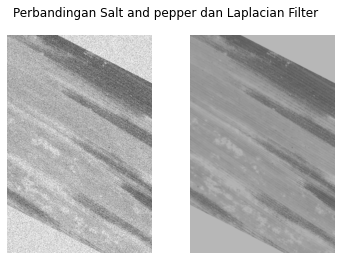

In [ ]:
laplacian = cv2.Laplacian(img_real1,cv2.CV_64F)
img_laplacian = img_real1 + laplacian
compare_image(sp, img_laplacian, "Perbandingan Salt and pepper dan Laplacian Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_laplacian)

MSE: 57.70827818627451
RMSE: 7.596596486998274
PSNR: 30.552418139541842


In [ ]:
from google.colab import files

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  laplacian = cv2.Laplacian(img_real,cv2.CV_64F)
  img_laplacian = img_real + laplacian
  mse, rmse, psnr = evaluation(img_real, img_laplacian)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Laplacian")
writer.save()

# Gaussian Filter

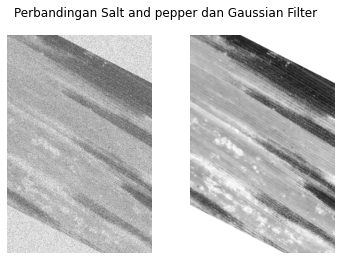

In [ ]:
img_gauss = cv2.GaussianBlur(img_real1, (9,9),0)
compare_image(sp, img_gauss, "Perbandingan Salt and pepper dan Gaussian Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_gauss)

MSE: 0.06298154555940023
RMSE: 0.2509612431420442
PSNR: 60.172666166591064


In [ ]:
from google.colab import files

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  img_gauss = cv2.GaussianBlur(img_real, (9,9),0)
  mse, rmse, psnr = evaluation(img_real, img_gauss)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Gaussian")
writer.save()

# Bilateral Filter

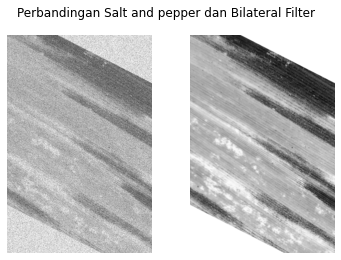

In [ ]:
img_bilateral = cv2.bilateralFilter(img_real1,9,75,75)
compare_image(sp, img_bilateral, "Perbandingan Salt and pepper dan Bilateral Filter")

In [ ]:
mse, rmse, psnr = evaluation(img_real1, img_bilateral)

MSE: 0.06470624279123414
RMSE: 0.2543742180159659
PSNR: 60.055337476521686


In [ ]:
from google.colab import files

index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  img_bilateral = cv2.bilateralFilter(img_real,9,75,75)
  mse, rmse, psnr = evaluation(img_real, img_bilateral)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Bilateral")
writer.save()

# Order Filter

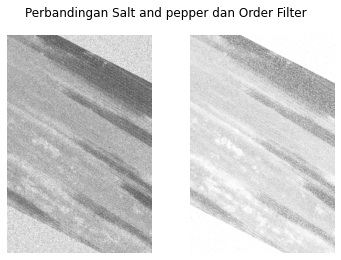

In [ ]:
from scipy import signal
import numpy as np
domain = np.identity(3)
sp, gauss = add_noise(img_real1)
img_order = signal.order_filter(sp, domain, 2)
compare_image(sp, img_order, "Perbandingan Salt and pepper dan Order Filter")

In [ ]:
from google.colab import files
from scipy import signal
import numpy as np
index = 0
img_ke = 1
tabel_hasil = []
kolom = ["Image","MSE", "RMSE", "PSNR"]
tabel_hasil.append(kolom)
for image in images_path:
  img_real = cv2.imread(image,0)
  domain = np.identity(3)
  sp, gauss = add_noise(img_real)
  img_order = signal.order_filter(sp, domain, 2)
  mse, rmse, psnr = evaluation(img_real, img_order)
  tabel_baris = [
      img_ke,
      mse,
      rmse,
      psnr
      
  ]
  index+=1
  img_ke+=1
  tabel_hasil.append(tabel_baris)

tabel_hasil = pd.DataFrame(tabel_hasil)
tabel_hasil.to_excel(writer, sheet_name="Evaluasi Order")
writer.save()